In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
trns = pd.read_csv("transaction_data.csv")

In [3]:
trns.head(2).transpose()

,0,1
_id,iDX4aGIBGGNNHRLOLmo3,cTX4aGIBGGNNHRLOVmvF
_index,gammarf,gammarf
_score,1,1
_source.alt,22.29,37.776
_source.epv,34.643,48.968
_source.epx,9.091,10.934
_source.epy,8.616,10.645
_source.freq,2442000000,2463000000
_source.lat,27.9565,27.9565
_source.lng,-82.4374,-82.4375


In [4]:
trns.dtypes

_id                   object
_index                object
_score               float64
_source.alt          float64
_source.epv          float64
_source.epx          float64
_source.epy          float64
_source.freq           int64
_source.lat          float64
_source.lng          float64
_source.module         int64
_source.protocol       int64
_source.pwr          float64
_source.rand          object
_source.sign          object
_source.stationid     object
_source.timestamp     object
_type                 object
dtype: object

In [5]:
trns.describe()

,_score,_source.alt,_source.epv,_source.epx,_source.epy,_source.freq,_source.lat,_source.lng,_source.module,_source.protocol,_source.pwr
count,59233.0,59233.000000,59233.000000,59233.000000,59233.000000,5.923300e+04,59233.000000,59233.000000,59233.0,59233.0,59233.000000
mean,1.0,19.634984,42.593708,10.616983,9.551825,2.417042e+09,27.956492,-82.437474,1.0,1.0,-38.782711
std,0.0,4.702038,18.356156,5.513564,1.528829,1.654555e+08,0.000025,0.000050,0.0,0.0,4.750146
min,1.0,2.554000,34.643000,9.091000,8.616000,4.695500e+08,27.956358,-82.437618,1.0,1.0,-51.945015
25%,1.0,16.564000,34.643000,9.091000,8.616000,2.432000e+09,27.956477,-82.437524,1.0,1.0,-42.022663
50%,1.0,19.493000,34.643000,9.091000,8.616000,2.441000e+09,27.956489,-82.437456,1.0,1.0,-39.006405
75%,1.0,22.348000,48.968000,10.934000,10.645000,2.458000e+09,27.956501,-82.437436,1.0,1.0,-35.703651
max,1.0,37.776000,152.684000,45.793000,17.196000,2.495000e+09,27.956663,-82.437355,1.0,1.0,-4.038129


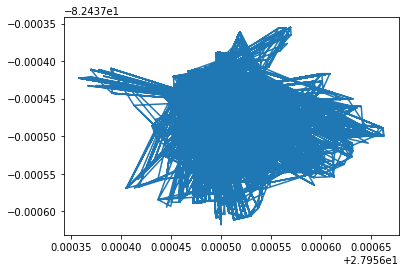

In [6]:
plt.plot(trns['_source.lat'], trns['_source.lng'])
plt.show()

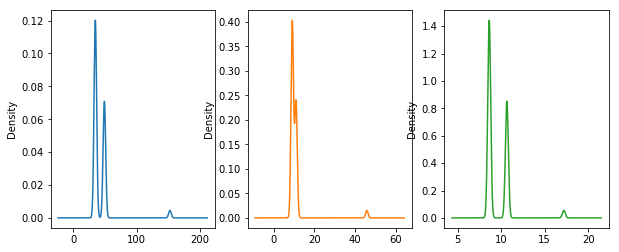

In [7]:
plt.rcParams['figure.figsize'] = (10.0, 4.0)
trns[['_source.epv','_source.epx','_source.epy']].plot(kind='density', subplots=True, layout=(1,3), sharex=False)
plt.show()

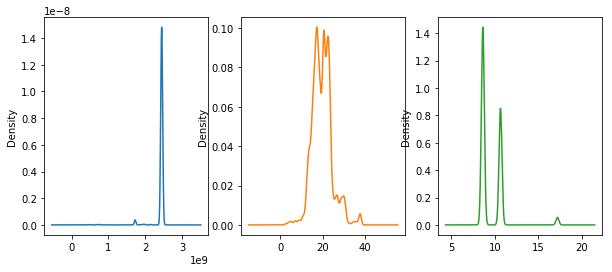

In [8]:
plt.rcParams['figure.figsize'] = (10.0, 4.0)
trns[['_source.freq','_source.alt','_source.epy']].plot(kind='density', subplots=True, layout=(1,3), sharex=False)
plt.show()

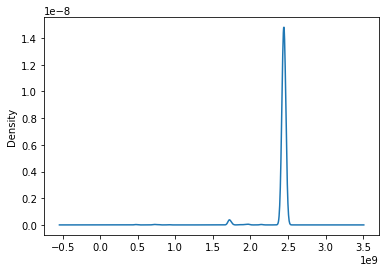

In [9]:
plt.rcParams['figure.figsize'] = (6.0, 4.0)
trns['_source.freq'].plot(kind="density")
plt.show()

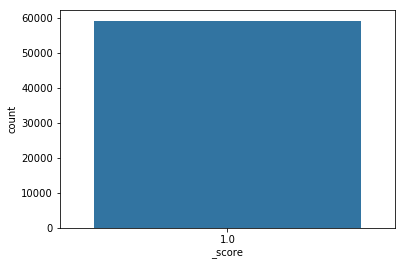

In [10]:
plt.rcParams['figure.figsize'] = (6.0, 4.0)
sns.countplot(trns['_score'])
plt.show()

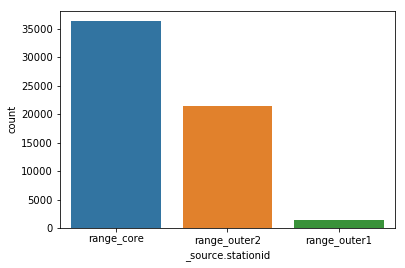

In [11]:
plt.rcParams['figure.figsize'] = (6.0, 4.0)
sns.countplot(trns['_source.stationid'])
plt.show()

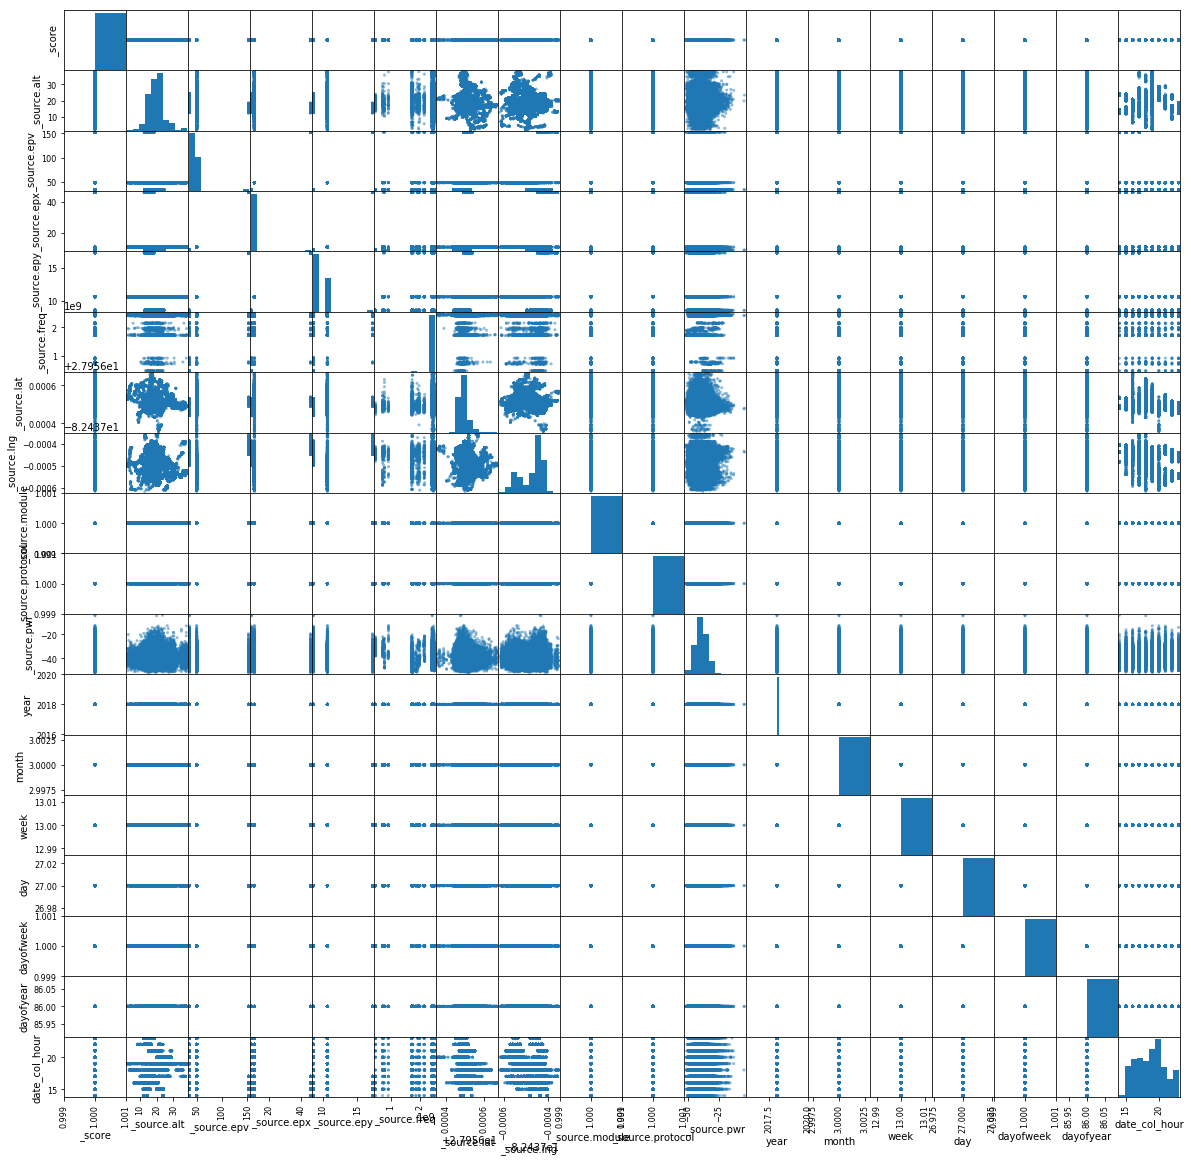

In [17]:
num_cols = trns.select_dtypes(exclude=["object","datetime64[ns]"]).columns.values.tolist()

plt.rcParams['figure.figsize'] = (20.0, 20.0)
scatter_matrix(trns[num_cols])
plt.show()

### Date Extraction

In [13]:
trns["_source.timestamp"] = pd.to_datetime(trns["_source.timestamp"])

In [14]:
trns["year"] = trns["_source.timestamp"].dt.year
trns["month"] = trns["_source.timestamp"].dt.month
trns["week"] = trns["_source.timestamp"].dt.week # day falls in which week
trns["day"] = trns["_source.timestamp"].dt.day # day in month
trns["dayofweek"] = trns["_source.timestamp"].dt.dayofweek # day in each week.
trns["dayofyear"] = trns["_source.timestamp"].dt.dayofyear
trns["date_col_hour"] = trns["_source.timestamp"].dt.hour

In [15]:
trns["date_col_hour"].value_counts()

20    10463
19     8652
17     7063
16     6848
18     6633
15     5688
21     5444
23     4887
22     3225
14      330
Name: date_col_hour, dtype: int64